<a href="https://colab.research.google.com/github/mbeatrizfranca/projeto_inform/blob/main/Inform_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install duckdb streamlit matplotlib plotly seaborn pandas numpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 40.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 45.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.8 MB/s eta 0:00:00


In [2]:
import duckdb
import plotly.express as px
import seaborn as sns

In [7]:
from google.colab import files


In [8]:
uploaded = files.upload()

Saving bupa.data to bupa.data


In [9]:
conn = duckdb.connect()
query = """
CREATE TABLE mytable AS
SELECT
column0 AS MCV,
column1 AS FA,
column2 AS TGP,
column3 AS TGO,
column4 AS GGT,
column5 AS Drinks,
FROM read_csv_auto('bupa.data');
"""

In [10]:
conn.execute(query)

In [11]:
## selects everything from the table
query = """
select *
from mytable
"""
## executes the query and create a dataframe from it.
df = conn.sql(query).df()
df

,MCV,FA,TGP,TGO,GGT,Drinks
0,85,92,45,27,31,0.0
1,85,64,59,32,23,0.0
2,86,54,33,16,54,0.0
3,91,78,34,24,36,0.0
4,87,70,12,28,10,0.0
...,...,...,...,...,...,...
340,99,75,26,24,41,12.0
341,96,69,53,43,203,12.0
342,98,77,55,35,89,15.0
343,91,68,27,26,14,16.0


In [18]:
import pandas as pd

# Calcula as medidas de sumário para todas as colunas do DataFrame
summary_table = df.describe().transpose()

# Aplica estilos CSS, formatação numérica e legenda à tabela
styled_table = summary_table.style.set_table_styles([
    {'selector': 'th', 'props': [('background-color', '#f2f2f2'), ('text-align', 'center')]},
    {'selector': 'td', 'props': [('text-align', 'center')]},
    {'selector': '', 'props': [('caption-side', 'bottom')]},  # Legenda no final
]).format({
    'count': "{:.0f}",
    'mean': "{:.2f}",
    'std': "{:.2f}",
    'min': "{:.0f}",
    '25%': "{:.2f}",
    '50%': "{:.2f}",
    '75%': "{:.2f}",
    'max': "{:.0f}",
}).set_caption(
    "Table 1. Summary statistics for all variables in the dataset."
)

# Exibe a tabela estilizada
display(styled_table)

,count,mean,std,min,25%,50%,75%,max
MCV,345,90.16,4.45,65,87.00,90.00,93.00,103
FA,345,69.87,18.35,23,57.00,67.00,80.00,138
TGP,345,30.41,19.51,4,19.00,26.00,34.00,155
TGO,345,24.64,10.06,5,19.00,23.00,27.00,82
GGT,345,38.28,39.25,5,15.00,25.00,46.00,297
Drinks,345,3.46,3.34,0,0.50,3.00,6.00,20


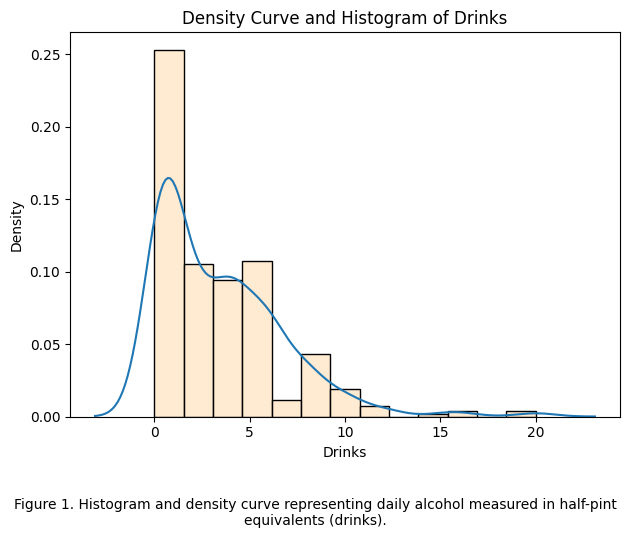

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
# Cria a figura e o eixo
fig, ax = plt.subplots()
# Plota a curva de densidade para a coluna 'Drinks'
sns.kdeplot(data=df, x='Drinks', ax=ax)
# Plota o histograma para a coluna 'drinks' com cor laranja clarinho e sem contorno
sns.histplot(data=df, x='Drinks', ax=ax, stat="density", kde=False, color='bisque')
# Define o título do gráfico
plt.title('Density Curve and Histogram of Drinks')

# Adiciona a legenda como Figure 1
plt.figtext(0.5, -0.1, 'Figure 1. Histogram and density curve representing daily alcohol measured in half-pint equivalents (drinks).',
wrap=True, horizontalalignment='center', fontsize=10)
# Ajusta o layout para evitar sobreposição
plt.tight_layout()
# Exibe o gráfico
plt.show()

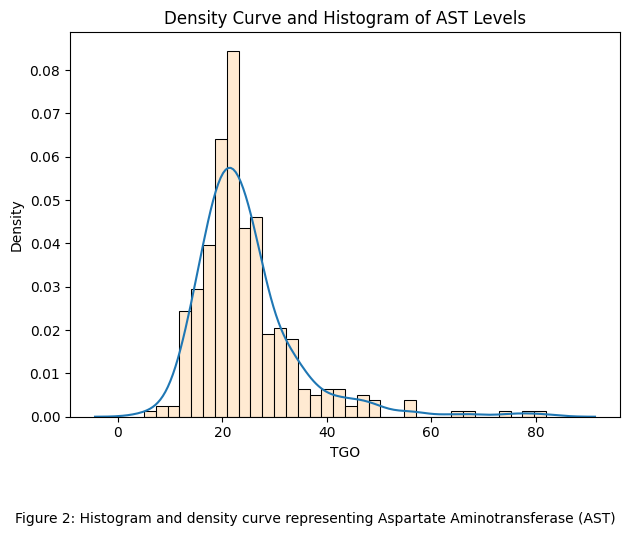

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
# Cria a figura e o eixo
fig, ax = plt.subplots()
# Plota a curva de densidade para a coluna 'TGO'
sns.kdeplot(data=df, x='TGO', ax=ax)
# Plota o histograma para a coluna 'TGO' com cor laranja claro
sns.histplot(data=df, x='TGO', ax=ax, stat="density", kde=False, color='bisque') # Define o título do gráfico
plt.title('Density Curve and Histogram of AST Levels')
# Adiciona a legenda como Figure 2
plt.figtext(0.5, -0.1, 'Figure 2: Histogram and density curve representing Aspartate Aminotransferase (AST)', wrap=True, horizontalalignment='center', fontsize=10)
# Ajusta o layout para evitar sobreposição
plt.tight_layout()
# Exibe o gráfico
plt.show()

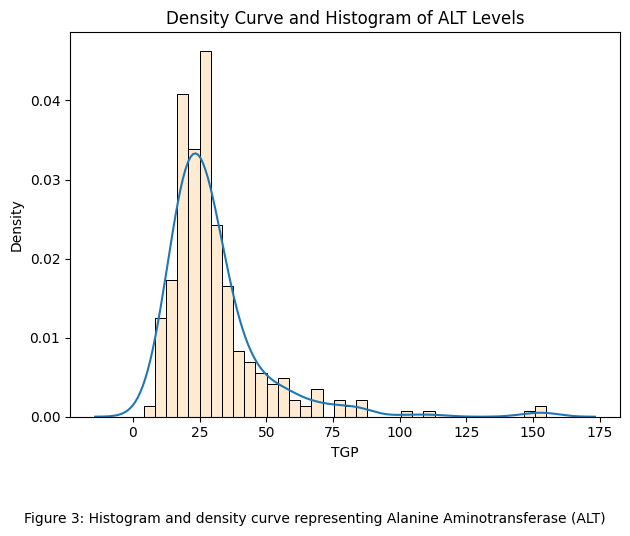

In [27]:
# Cria a figura e o eixo
fig, ax = plt.subplots()
# Plota a curva de densidade para a coluna 'TGP'
sns.kdeplot(data=df, x='TGP', ax=ax)
# Plota o histograma para a coluna 'TGP' com cor laranja claro
sns.histplot(data=df, x='TGP', ax=ax, stat="density", kde=False, color='bisque') # Define o título do gráfico
plt.title('Density Curve and Histogram of ALT Levels')
# Adiciona a legenda como Figure 3
plt.figtext(0.5, -0.1, 'Figure 3: Histogram and density curve representing Alanine Aminotransferase (ALT)', wrap=True, horizontalalignment='center', fontsize=10)
# Ajusta o layout para evitar sobreposição
plt.tight_layout()
# Exibe o gráfico
plt.show()

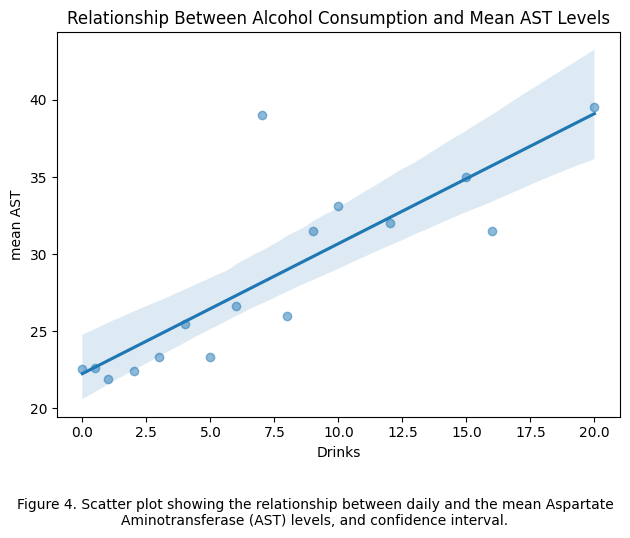

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# Agrupa os dados por 'drinks' e calcula a média de 'GGT'
df_mean = df.groupby('Drinks')['TGO'].mean().reset_index()
# Cria o scatter plot com linha de regressão linear
sns.regplot(x='Drinks', y='TGO', data=df_mean, scatter_kws={'alpha':0.5})
# Define o título do gráfico
plt.title('Relationship Between Alcohol Consumption and Mean AST Levels')
# Renomeia o eixo y
plt.ylabel('mean AST')
# Adiciona a legenda como Figure 4
plt.figtext(0.5, -0.1, 'Figure 4. Scatter plot showing the relationship between daily alcohol consumption and the mean Aspartate Aminotransferase (AST) levels, and confidence interval.',
wrap=True, horizontalalignment='center', fontsize=10)
# Ajusta o layout para evitar sobreposição
plt.tight_layout()
# Exibe o gráfico
plt.show()

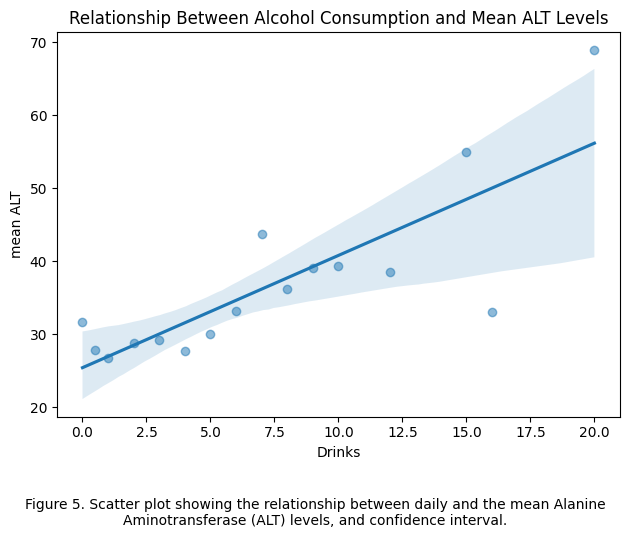

In [32]:
# Agrupa os dados por 'drinks' e calcula a média de 'TGP'
df_mean = df.groupby('Drinks')['TGP'].mean().reset_index()
# Cria o scatter plot com linha de regressão linear
sns.regplot(x='Drinks', y='TGP', data=df_mean, scatter_kws={'alpha':0.5})
# Define o título do gráfico
plt.title('Relationship Between Alcohol Consumption and Mean ALT Levels')
# Renomeia o eixo y
plt.ylabel('mean ALT')
# Adiciona a legenda como Figure 5
plt.figtext(0.5, -0.1, 'Figure 5. Scatter plot showing the relationship between daily alcohol consumption and the mean Alanine Aminotransferase (ALT) levels, and confidence interval.',
wrap=True, horizontalalignment='center', fontsize=10)
# Ajusta o layout para evitar sobreposição
plt.tight_layout()
# Exibe o gráfico
plt.show()

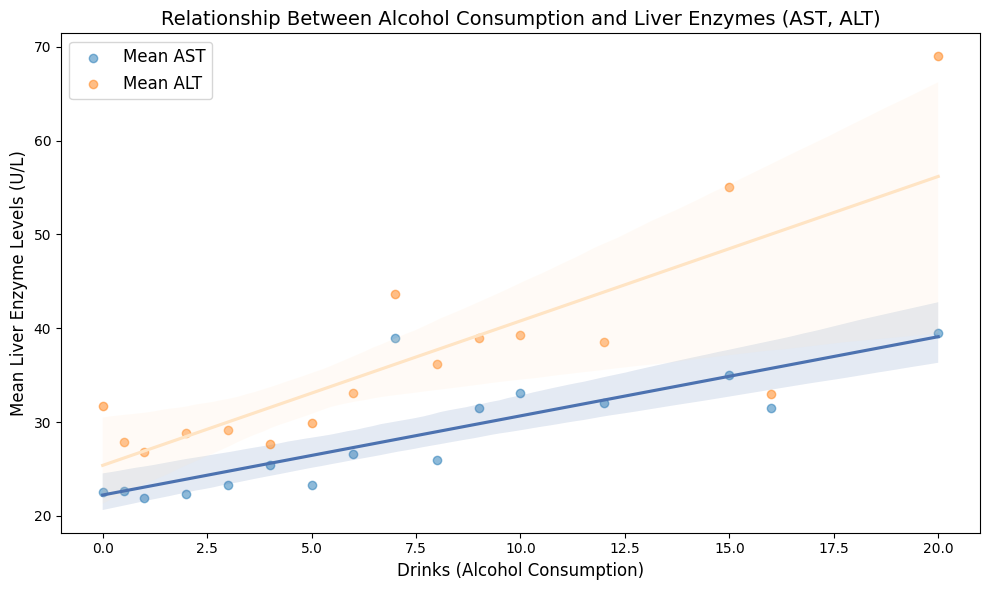

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Agrupa os dados por 'Drinks' e calcula a média de 'TGO' e 'TGP'
df_mean = df.groupby('Drinks')[['TGO', 'TGP']].mean().reset_index()

# Configura o tamanho do gráfico
plt.figure(figsize=(10, 6))

# Plota a relação Drinks vs Média de TGO (AST)
sns.regplot(x='Drinks', y='TGO', data=df_mean, label='Mean AST', scatter_kws={'alpha': 0.5}, line_kws={'color': '#4c72b0'})

# Plota a relação Drinks vs Média de TGP (ALT)
sns.regplot(x='Drinks', y='TGP', data=df_mean, label='Mean ALT', scatter_kws={'alpha': 0.5}, line_kws={'color': 'bisque'})

# Adiciona título e rótulos
plt.title('Relationship Between Alcohol Consumption and Liver Enzymes (AST, ALT)', fontsize=14)
plt.xlabel('Drinks (Alcohol Consumption)', fontsize=12)
plt.ylabel('Mean Liver Enzyme Levels (U/L)', fontsize=12)

# Adiciona a legenda
plt.legend(fontsize=12)

# Ajusta o layout e exibe o gráfico
plt.tight_layout()
plt.show()

